# 10. Gaussian Kernel Regression

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rhennig/EMA6938/blob/main/Notebooks/10.GaussianKernelRegression.ipynb)

(Based on https://towardsdatascience.com/kernel-regression-from-scratch-in-python-ea0615b23918)

In this example, we apply Gaussian kernel regression to a one-dimensional dataset.

## Gaussian Kernel

In Gaussian kernel regression the shape of the kernel is the Gaussian curve:
$$
\frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{z^2}{2} \right ).
$$

Each constructed kernel describes a normal distribution with mean value ${\bf x}_i$ and standard deviation $b$, where $b$ is a hyperparameter that controls the width of the Gaussian:
$$
k(x, x_i) = \frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{(x-x_i)^2}{2b^2} \right ).
$$

Note that the normalization of the Gaussian does not matter as the weights are being normalized themselves.

## Prediction

The weights for a given new input $\tilde x$ are calculated from the normalized kernel values:
$$
w_i = \frac{k(\tilde x, x_i)}{\sum_{l=1}^N k(x_l, x_i)}.
$$

The prediction $\tilde y$ is obtained by multiplying the weight vector ${\bf w} = [w_1, w_2, \dots, w_N]$ with the label vector ${\bf y} = [y_1, y_2, \dots, y_N]$:
$$
\tilde y = \sum_{i=1}^N w_i y_i.
$$

## 1-Dimensional Gaussian Kernel Regression

In [1]:
from scipy.stats import norm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

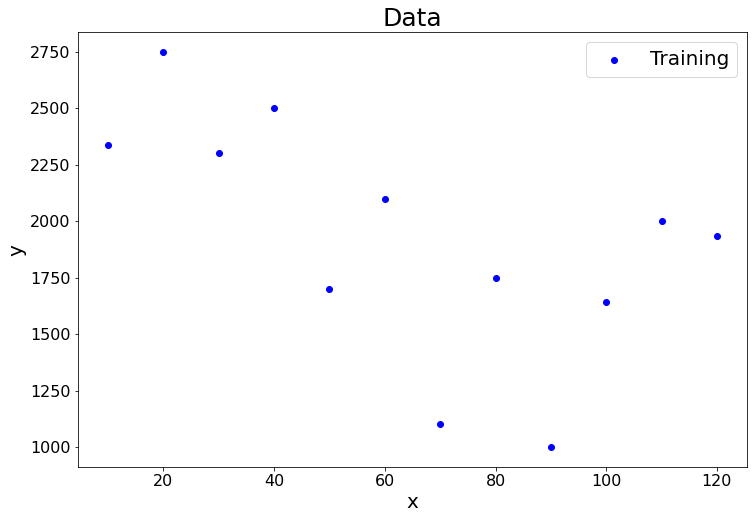

In [2]:
# Create a 1D dataset
X = np.array([10,20,30,40,50,60,70,80,90,100,110,120])
Y = np.array([2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932])

# Plot the dataset
fig,ax=plt.subplots(figsize=(12,8))
ax.scatter(X, Y, color='blue', label='Training')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
ax.set_title('Data',fontsize=25)
plt.legend(fontsize=20)
plt.show()

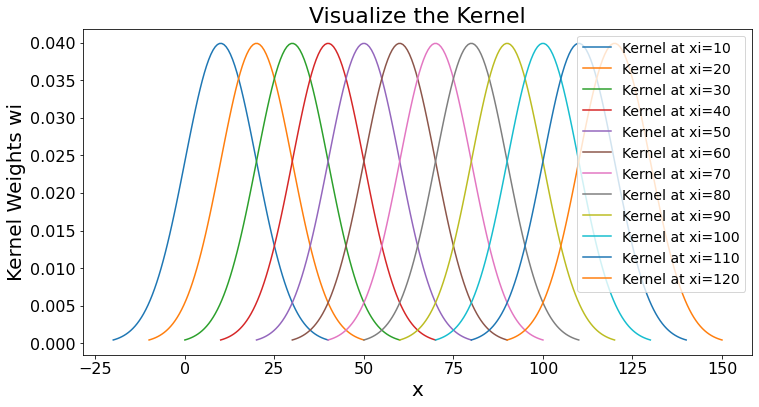

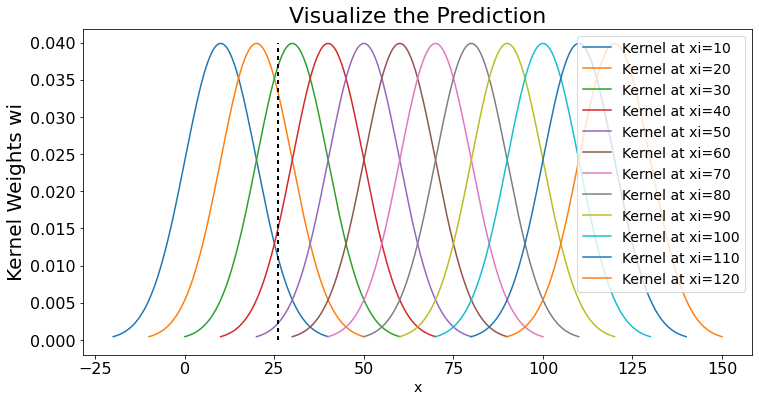

In [3]:
# Define a class for Gaussian Kernel Regression
class GKR:
    
    def __init__(self, x, y, b):
        self.x = x
        self.y = y
        self.b = b
    
    # Implement the Gaussian Kernel
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    # Calculate weights and return prediction
    def predict(self, X):
        kernels = [self.gaussian_kernel((xi-X)/self.b) for xi in self.x]
        weights = [kernel/np.sum(kernels) for kernel in kernels]
        return np.dot(weights, self.y)

    # Visualize the kernels
    def visualize_kernels(self, precision):
        plt.figure(figsize = (12,6))
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = norm.pdf(x_normal, xi, self.b)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.title('Visualize the Kernel', fontsize=22)
        plt.ylabel('Kernel Weights wi', fontsize=20)
        plt.xlabel('x', fontsize=20)
        plt.legend(fontsize=14)
    
    # Visualize the predictions
    def visualize_predictions(self, precision, X):
        plt.figure(figsize = (12,6))
        max_y = 0
        for xi in self.x:
            x_normal = np.linspace(xi - 3*self.b, xi + 3*self.b, precision)
            y_normal = norm.pdf(x_normal, xi, self.b)
            max_y = max(max(y_normal), max_y)
            plt.plot(x_normal, y_normal, label='Kernel at xi=' + str(xi))
            
        plt.title('Visualize the Prediction', fontsize=22)
        plt.plot([X,X], [0, max_y], 'k-', lw=2,dashes=[2, 2])
        plt.ylabel('Kernel Weights wi', fontsize=20)
        plt.xlabel('x', fontsize=14)
        plt.legend(fontsize=14)

# Set the width of the Gaussian kernel
b = 10

gkr = GKR(X, Y, b)
gkr.visualize_kernels(100)

# Prediction for test x
x = 26.0
gkr.visualize_predictions(200, x)

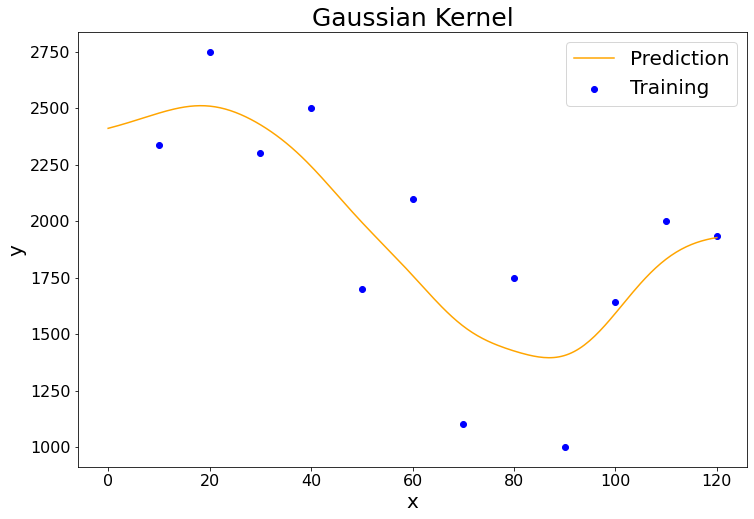

In [4]:
# Visualize the 1-dimensional prediction
fig,ax = plt.subplots(figsize=(12,8))
xlist = np.linspace(0, 120, 240)
ylist = np.array([])

for x in xlist:
    ylist = np.append(ylist, gkr.predict(x))

ax.scatter(X, Y, color='blue', label='Training')
ax.plot(xlist, ylist, color='orange', label='Prediction')
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(fontsize=20)
ax.set_title('Gaussian Kernel',fontsize=25)
plt.show()

## N-dimensional Kernel Regression

For $N$-dimenisonal inputs, the only modification we need to make is to calculate the kernels with the Eucledian metric.
$$
k(x, x_i) = \frac{1}{\sqrt{2\pi}} \exp \left ( - \frac{\|{\bf x}-{\bf x}_i\|^2}{2b^2} \right ).
$$



In [130]:
# N-dimensional using numpy

from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal
from matplotlib import cm

'''Class for Gaussian Kernel Regression'''
class GKR:
    
    def __init__(self, x, y, b):
        self.x = np.array(x)
        self.y = np.array(y)
        self.b = b
    
    '''Implement the Gaussian Kernel'''
    def gaussian_kernel(self, z):
        return (1/np.sqrt(2*np.pi))*np.exp(-0.5*z**2)
    
    '''Calculate weights and return prediction'''
    def predict(self, X):
        kernels = np.array([self.gaussian_kernel((np.linalg.norm(xi-X))/self.b) for xi in self.x])
        weights = np.array([len(self.x) * (kernel/np.sum(kernels)) for kernel in kernels])
        return np.dot(weights.T, self.y)/len(self.x)

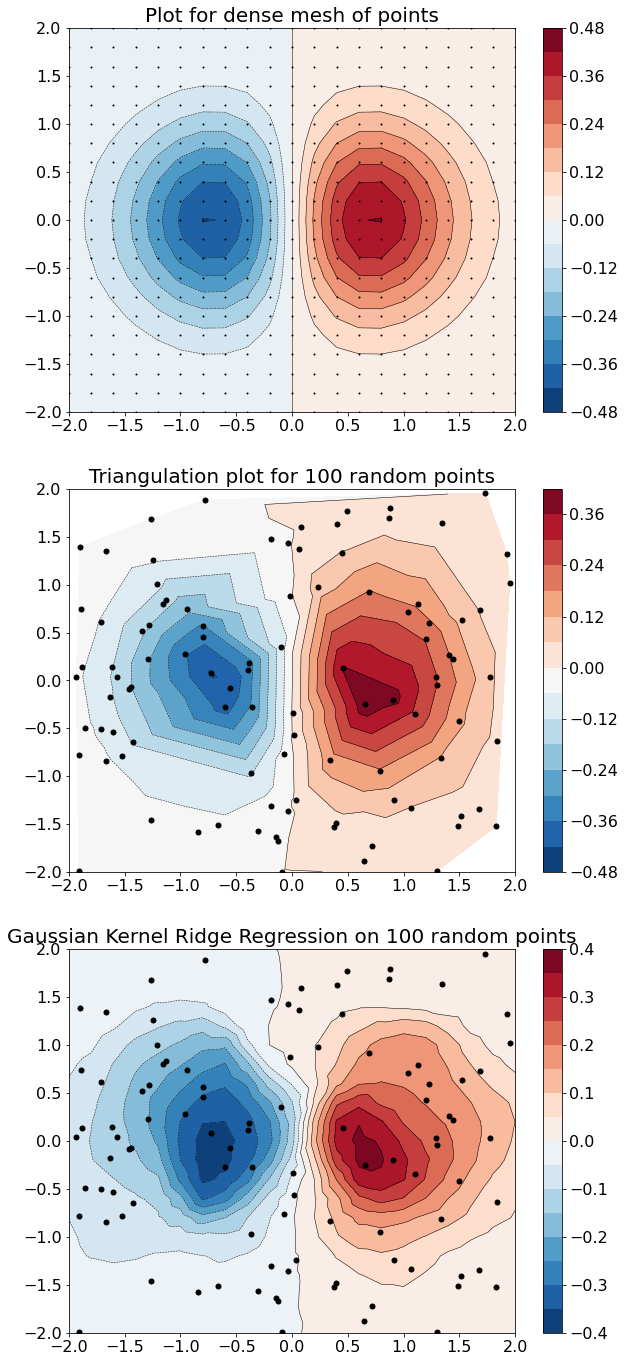

In [146]:
def func(x, y):
        return (x * np.exp(-x**2 - y**2))

# Plot function using a dense regular mesh
x = np.linspace(-2, 2, 21)
y = np.linspace(-2, 2, 21)
xx, yy = np.meshgrid(x, y)
z = func(xx, yy)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10, 24))

ax1.contour(xx, yy, z, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xx, yy, z, levels=14, cmap="RdBu_r")
fig.colorbar(cntr1, ax=ax1)
ax1.plot(xx, yy, 'ko', ms=1)
ax1.set(xlim=(-2, 2), ylim=(-2, 2))
ax1.set_title('Plot for dense mesh of points', fontsize = 20)
plt.subplots_adjust(hspace=0.2)
    
np.random.seed(23971)
npts = 100
x = np.random.uniform(-2, 2, npts)
y = np.random.uniform(-2, 2, npts)
X_train = np.vstack((x, y)).T
Y_train = func(x, y)

ax2.tricontour(x, y, Y_train, levels=14, linewidths=0.5, colors='k')
cntr2 = ax2.tricontourf(x, y, Y_train, levels=14, cmap="RdBu_r")

fig.colorbar(cntr2, ax=ax2)
ax2.plot(x, y, 'ko', ms=5)
ax2.set(xlim=(-2, 2), ylim=(-2, 2))
ax2.set_title('Triangulation plot for %d random points' % npts, fontsize = 20)

# Train Gaussian Kernel Regression on the random points
b = 0.25
gkr = GKR(X_train, Y_train, b)

xx = xx.flatten()
yy = yy.flatten()

z = np.array([])
for i in range(len(xx)):
    x_val = xx[i]
    y_val = yy[i]
    arg   = np.array([x_val, y_val])
    z = np.append(z, gkr.predict(arg))

ax3.tricontour(xx, yy, z, levels=14, linewidths=0.5, colors='k')
cntr3 = ax3.tricontourf(xx, yy, z, levels=14, cmap="RdBu_r")

fig.colorbar(cntr3, ax=ax3)
ax3.plot(x, y, 'ko', ms=5)
ax3.set(xlim=(-2, 2), ylim=(-2, 2))
ax3.set_title('Gaussian Kernel Ridge Regression on %d random points' % npts, fontsize = 20)

plt.show()